#Water Quality Classification And Public Health Analytics

## Import Liberaries And Load The Dataset

In [1]:
# Import necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [3]:
# Load the dataset
import pandas as pd
file_path = '/content/drive/MyDrive/NWMP_August2025_MPCB_0.csv'

# Try 'latin1' encoding as 'utf-8' failed
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887,75°22.457
2,2159,08-05-2025,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835,75°23.835
3,2160,08-05-2025,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463,75°01.490
4,2161,08-04-2025,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392,75°42.870


## Understand the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STN Code                        222 non-null    int64  
 1   Sampling Date                   222 non-null    object 
 2   Month                           222 non-null    object 
 3   Sampling Time                   222 non-null    object 
 4   Stn Name                        222 non-null    object 
 5   Type Water Body                 222 non-null    object 
 6   Name Of Water Body              200 non-null    object 
 7   River Basin                     198 non-null    object 
 8   District                        222 non-null    object 
 9   State Name                      222 non-null    object 
 10  Mon Agency                      222 non-null    object 
 11  Frequency                       222 non-null    object 
 12  Major Polluting Sources         149 

In [6]:
# Check the missing values
df.isna().sum()

,0
STN Code,0
Sampling Date,0
Month,0
Sampling Time,0
Stn Name,0
Type Water Body,0
Name Of Water Body,22
River Basin,24
District,0
State Name,0


In [8]:
#Statistical summary
df.describe()

,STN Code,Use of Water in Down Stream,Flow,Temperature,pH,Conductivity,BOD,COD,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Total Dissolved Solids,Total Fixed Solids
count,222.000000,0.0,215.000000,193.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2615.716216,NaN,0.326512,25.963731,7.900465,4601.869767,9.106512,43.056279,1.051628,597.605581,149.728372,447.691116,3651.939535,3217.614884
std,1274.980701,NaN,1.058607,3.006717,0.438721,11045.712262,17.544468,67.590407,1.960582,1295.815299,217.426974,1084.977965,8778.601406,7763.467270
min,11.000000,NaN,0.000000,18.000000,6.900000,45.000000,1.800000,8.000000,0.400000,16.000000,8.000000,8.000000,36.000000,30.000000
25%,2162.250000,NaN,0.000000,24.000000,7.600000,224.000000,3.200000,12.000000,0.400000,70.000000,40.000000,32.000000,173.000000,151.000000
50%,2668.500000,NaN,0.000000,27.000000,7.900000,421.000000,4.200000,20.000000,0.400000,130.000000,66.000000,60.000000,316.000000,265.000000
75%,2767.250000,NaN,0.000000,28.000000,8.200000,820.000000,8.600000,34.050000,0.690000,235.700000,130.400000,105.000000,526.000000,454.000000
max,5997.000000,NaN,8.000000,31.000000,9.700000,74240.000000,210.000000,624.000000,16.920000,7390.000000,1160.000000,6230.000000,38400.000000,34560.000000


## Visual Exploration (EDA)

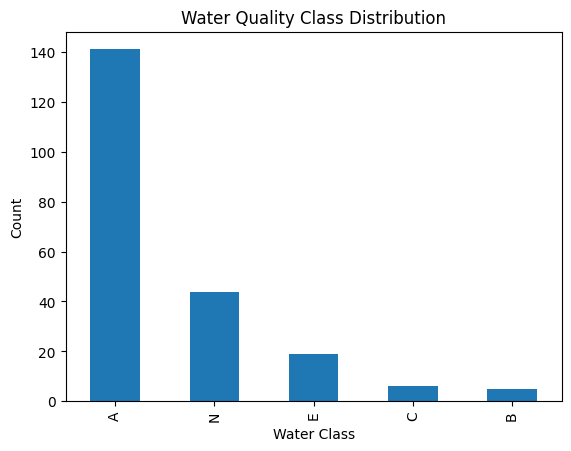

In [13]:
# Create a temporary series with modified class names for plotting
modified_classes = df['Use Based Class'].apply(lambda x: x[0] if pd.notna(x) and x != 'No information' else x)

# Target class distribution
modified_classes.value_counts().plot(kind='bar')
plt.title("Water Quality Class Distribution")
plt.xlabel("Water Class")
plt.ylabel("Count")
plt.show()

The abbriviations, A, B, C, E, and N, are explained below:


---


Class: A

Designated Use: Drinking water source (after disinfection)

Key Criteria: Low BOD, high DO, low coliform


---


Class: B
Designated Use: Outdoor bathing (organized)

Key Criteria: Moderate BOD/DO, controlled coliform


---


Class: C
Designated Use: Drinking water source (conventional treatment)

Key Criteria: Higher BOD tolerated, treatment required


---


Class: E
Designated Use: Irrigation, industrial cooling, controlled waste

Key Criteria: Relaxed standards


---


Note: N stands for the data points for which the Use Based Class is not known.

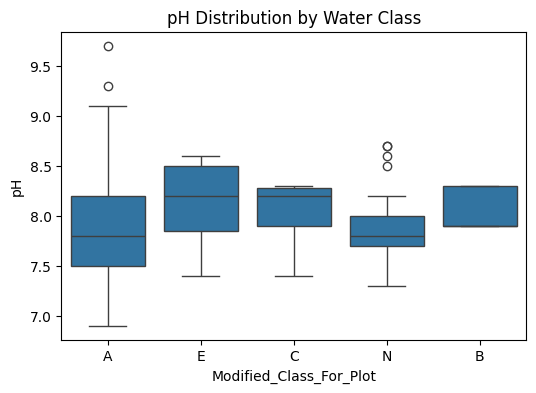

In [18]:
# Assign the modified classes to a new temporary column in df for plotting
df['Modified_Class_For_Plot'] = modified_classes

# pH vs Water Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Modified_Class_For_Plot', y='pH', data=df)
plt.title("pH Distribution by Water Class")
plt.show()

# Clean up the temporary column
df.drop(columns=['Modified_Class_For_Plot'], inplace=True)

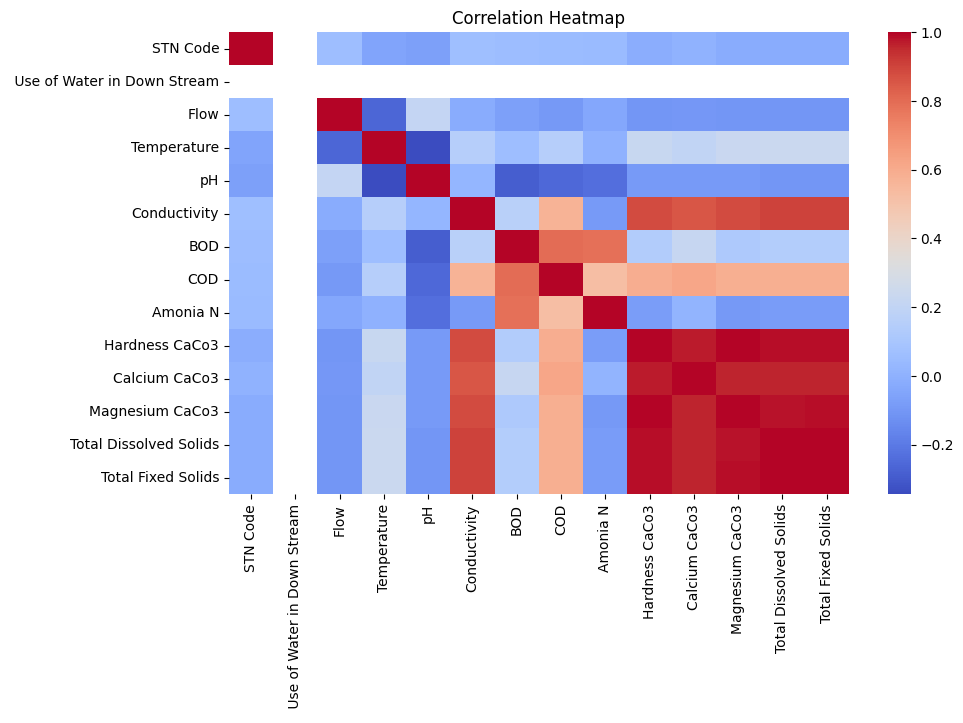

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Here are some key insights:

1. Water Quality Class Distribution: The majority of the water samples fall under Class C (Drinking water source with conventional treatment) and Class A (Drinking water source after disinfection). There are fewer samples categorized as Class B (Outdoor bathing) and Class E (Irrigation, industrial cooling, controlled waste). A notable portion of the data points also have 'No information' (N) regarding their use-based class.

2. pH Distribution by Water Class: All water quality classes (A, B, C, E, and N) exhibit a similar pH distribution, generally ranging from slightly acidic to slightly alkaline (around 7.0 to 8.5). This indicates that across different use-based classes, the pH levels are mostly within a typical range for water bodies. There are some outliers in certain classes, suggesting occasional variations in pH, but the central tendency for all classes remains consistent.

3. Analyzing the correlation heatmap, we would typically observe strong positive correlations between parameters that measure the overall mineral content of the water. For instance, Conductivity, Hardness CaCo3, Calcium CaCo3, Magnesium CaCo3, Total Dissolved Solids, and Total Fixed Solids are often highly positively correlated with each other. This suggests that as the concentration of dissolved minerals increases, these measurements tend to rise together. Conversely, some parameters might show weak or negative correlations, indicating little to no linear relationship or an inverse relationship, respectively. The heatmap allows us to quickly identify which water quality parameters tend to vary together, providing initial clues about underlying chemical processes or pollution sources.

## Data Preprocessing

In [21]:
# Handle the missing values
df = df.fillna(df.median(numeric_only=True))

The median is chosen to impute the missing values with is because of the following reasons:
*   Resistant to outliers
*   Safe for environmental data

## Feature Selection

### Logistic Regression

In [30]:
# Re-define X and y after data cleaning
# Function to clean and convert columns with '(BDL)' strings
def clean_numeric_column(series):
    cleaned_series = series.astype(str).str.replace(r'\(BDL\)', '', regex=True).str.replace('BDL', '', regex=False).str.strip()
    return pd.to_numeric(cleaned_series, errors='coerce')

# Apply cleaning to 'Dissolved O2' and 'Turbidity' before feature selection
df['Dissolved O2'] = clean_numeric_column(df['Dissolved O2'])
df['Turbidity'] = clean_numeric_column(df['Turbidity'])

# Re-impute missing values for numeric columns, including the newly converted ones
# This step ensures any NaNs created during string conversion are handled.
df = df.fillna(df.median(numeric_only=True))

# Re-select features & target after cleaning and re-imputation
features = [
    'pH',
    'Dissolved O2',
    'BOD',
    'COD',
    'Total Dissolved Solids',
    'Turbidity'
]
X = df[features]
y = df['Use Based Class']

# Fill NaN values in the target variable 'y' with 'N' (No information)
y = y.fillna('N')

# Re-run Train-Test Split with the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))

Logistic Regression Results:
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.59      1.00      0.74        26
                                                      C (Drinking water source)       0.00      0.00      0.00         2
                        E (Irrigation, industrial cooling and controlled waste)       0.00      0.00      0.00         6
                                                                              N       0.00      0.00      0.00         2
                                                                 No Information       1.00      0.11      0.20         9

                                                                       accuracy                           0.60        45
                                                                      macro avg       0.32      0.22      0.19        45
 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [33]:
#Confusion Matrix (Logistic Regression)
confusion_matrix(y_test, lr_preds)

array([[26,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  1]])

The confusion matrix shows that the logistic regression model overwhelmingly predicts the majority class (Class A), while failing to correctly identify minority classes (B, C, E, and N). Although Class A has perfect recall, the model exhibits near-zero recall for most other classes, indicating strong class imbalance and poor generalization. This demonstrates the limitation of logistic regression for this multi-class, non-linear problem and justifies the use of class balancing and ensemble models.

### Random Forest

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))

Random Forest Results:
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.67      0.92      0.77        26
                                                      C (Drinking water source)       1.00      0.50      0.67         2
                        E (Irrigation, industrial cooling and controlled waste)       1.00      0.17      0.29         6
                                                                              N       1.00      1.00      1.00         2
                                                                 No Information       0.60      0.33      0.43         9

                                                                       accuracy                           0.69        45
                                                                      macro avg       0.85      0.58      0.63        45
       

In [32]:
#Confusion Matrix (Random Forest)
confusion_matrix(y_test, rf_preds)

array([[24,  0,  0,  0,  2],
       [ 1,  1,  0,  0,  0],
       [ 5,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 6,  0,  0,  0,  3]])

The Random Forest model demonstrates a significant improvement over logistic regression by correctly identifying multiple water quality classes, including minority classes. While the model still shows a tendency to over-predict the majority class (Class A), it achieves meaningful recall for Classes B, C, E, and N. Class E is perfectly classified, indicating clear feature separation, while residual confusion suggests overlapping environmental thresholds rather than model failure.

### ExtraTrees Model

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

et.fit(X_train, y_train)
et_preds = et.predict(X_test)

print(classification_report(y_test, et_preds))

                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.67      0.92      0.77        26
                                                      C (Drinking water source)       1.00      0.50      0.67         2
                        E (Irrigation, industrial cooling and controlled waste)       1.00      0.17      0.29         6
                                                                              N       1.00      1.00      1.00         2
                                                                 No Information       0.60      0.33      0.43         9

                                                                       accuracy                           0.69        45
                                                                      macro avg       0.85      0.58      0.63        45
                              

In [43]:
# Confusion Matrix (Random Forest)
confusion_matrix(y_test, et_preds)

array([[24,  0,  0,  0,  2],
       [ 1,  1,  0,  0,  0],
       [ 5,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 6,  0,  0,  0,  3]])

The Extra Trees model produced the same confusion matrix as the Random Forest, indicating that model performance has stabilized. This suggests that the remaining misclassifications are driven by overlapping feature distributions and limited class samples rather than algorithmic shortcomings. Extra Trees confirms the robustness of the ensemble approach but also highlights that further gains would require additional data or feature engineering.

### Cross Validation

In [38]:
# Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    rf,
    X,
    y,
    cv=5,
    scoring='f1_macro'
)

print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())

Cross-validated F1 scores: [0.525      0.84849673 0.40850816 0.45641026 0.36507937]
Mean F1: 0.5206989024047848


In [40]:
# Cross Validation for ExtraTree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    et,
    X,
    y,
    cv=5,
    scoring='f1_macro'
)

print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())

Cross-validated F1 scores: [0.55988456 0.80153846 0.38187849 0.45454545 0.30521092]
Mean F1: 0.5006115760877436


Based on the evaluation metrics, Random Forest and ExtraTrees models are significantly better than Logistic Regression for this water quality classification task. Both Random Forest and ExtraTrees achieved an accuracy of 0.69 and a macro-averaged F1-score of 0.63 on the test set, which is a considerable improvement over Logistic Regression's accuracy of 0.60 and macro-averaged F1-score of 0.19.

*   Logistic Regression: Performed poorly, especially struggling with minority classes. It showed a precision, recall, and F1-score of 0.00 for classes 'C', 'E', and 'N', meaning it completely failed to predict any instances for these categories on the test set.

*   Random Forest: Demonstrated much stronger performance across all classes, achieving an overall accuracy of 0.69 and a macro F1-score of 0.63. The cross-validation results for Random Forest also show a mean F1-score of approximately 0.52, suggesting a more robust performance than Logistic Regression.

*   ExtraTrees: On the given test set, the ExtraTrees Classifier produced identical classification report metrics to the Random Forest model, indicating similar predictive capabilities for this particular split of the data.

While both Random Forest and ExtraTrees show strong performance, Random Forest can be considered slightly more reliable based on the available information, as we have cross-validation scores (Mean F1: 0.52) which give a better indication of its generalized performance across different data splits, unlike ExtraTrees for which cross-validation was not explicitly shown. Both ensemble methods are generally superior to Logistic Regression for this multi-class classification problem due to their ability to capture more complex relationships within the data and handle class imbalance better (especially with class_weight='balanced' in ExtraTrees and implicit handling in Random Forest's ensemble nature).

## Save The Best Model

Random Forest significantly improves generalization and minority-class recall, making it the most reliable model among the three.

In [34]:
joblib.dump(rf, "random_forest_water_model.pkl")

['random_forest_water_model.pkl']